# 离散化
将较大范围分布比较稀疏的数映射到较小数据范围内进行存储，然后再利用前缀和性质进行相关计算  
**acwing 区间和**
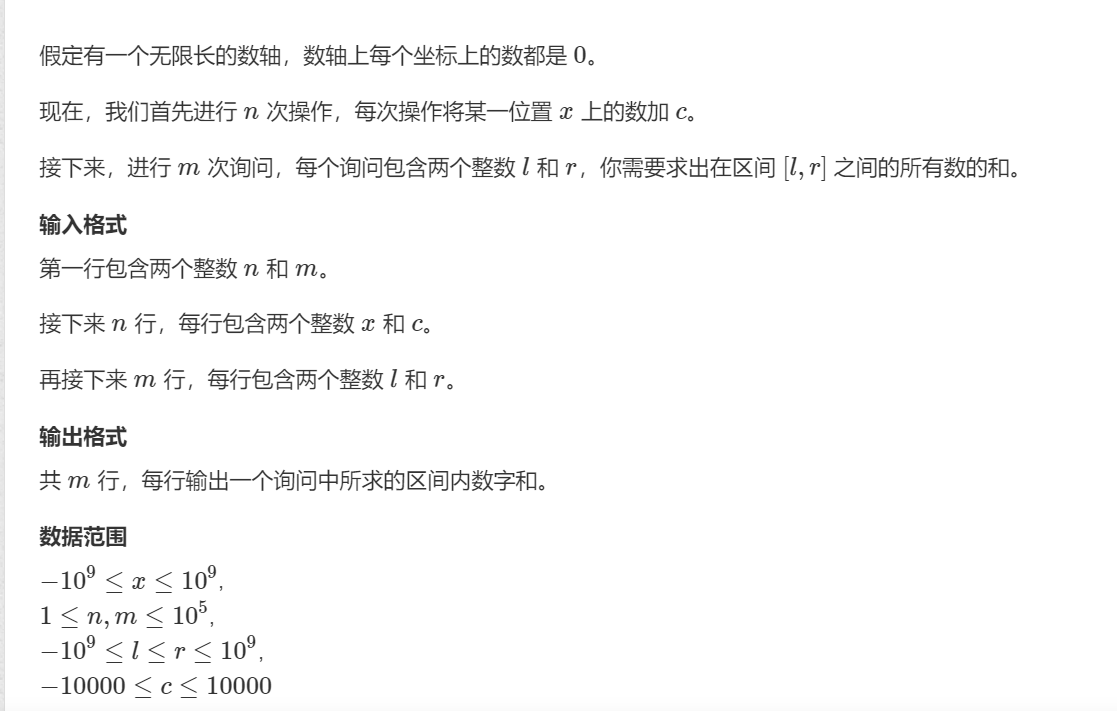  
代码如下：  
```C
#include <iostream>
#include <algorithm>
#include <vector>

using namespace std;

typedef pair<int, int> PII;
int n, m;
const int N = 300010;
int a[N], s[N];
vector<int> alls;//存储所有下标
vector<PII> adds, querys;//分别存储添加的元素对，和查询的元素对

//进行小标查找，映射
int find(int x)
{
    int l = 0, r = alls.size() - 1;
    while(l < r)
    {
        int mid = l + r >> 1;
        if(alls[mid] >= x) r = mid;
        else
        l = mid + 1;
    }
    return l + 1;
}

int main()
{
    // 离散化，将数据范围比较广的数据，映射到数据范围较小的数组中，然后再利用前缀和进行求解
    scanf("%d%d", &n, &m);
    for(int i = 0;i < n;i++)
    {
        int x, c;
        scanf("%d%d", &x, &c);
        adds.push_back({x, c});
        alls.push_back(x);
    }
    //把查询元素的下标添加到alls里面
    for(int i = 0;i < m;i++)
    {
        int l, r;
        scanf("%d%d", &l, &r);
        alls.push_back(l);
        alls.push_back(r);
        querys.push_back({l, r});
    }
    //对下标进行去重
    sort(alls.begin(), alls.end());
    alls.erase(unique(alls.begin(), alls.end()), alls.end());
    
    for(PII item:adds)
    {
        int x = item.first, c = item.second;
        x = find(x);
        a[x] += c;
    }
    //求前缀和
    for(int i = 1;i <= alls.size();i++) 
    {
        s[i] = s[i - 1] + a[i];
    }
    for(PII item: querys)
    {
        int l = find(item.first), r = find(item.second);
        cout << s[r] - s[l - 1] << endl;
    }

    return 0;
}
```
### **去重模板**
```
sort(alls.begin(), alls.end());
    alls.erase(unique(alls.begin(), alls.end()), alls.end());
```  
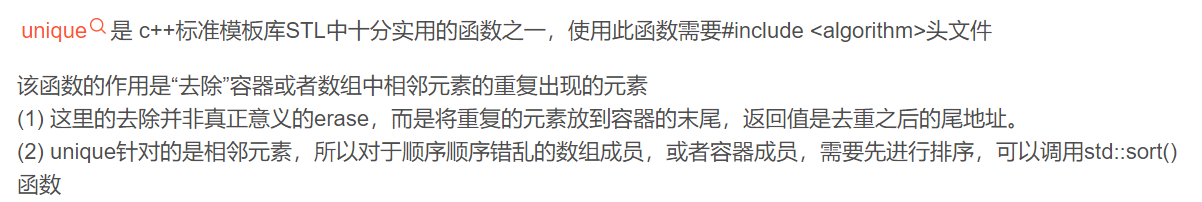  